In [82]:
import pandas as pd
import os

my_path = '/Users/neslihansavur/Desktop/Lojistik Regresyon'
data = pd.read_excel(os.path.join(my_path,'neslihan.xlsx'))
data.head()

,Version,Rating,Gender,EncodedTime_T,Date,Cars_Unlocked,Age,Current_Level,Currency,Failed_Attemps,Crash,Churner
0,2.4,1,Male,284723,12 / 25 / 2021 7 : 5 : 23 AM,5,30,21,2267,4,0,0
1,2.4,1,Male,349189,12 / 26 / 2021 0 : 59 : 49 AM,9,30,26,4813,4,0,0
2,1.2,5,Female,294565,12 / 25 / 2021 9 : 49 : 25 AM,1,15,1,101,0,0,0
3,1.2,5,Female,315633,12 / 25 / 2021 3 : 40 : 33 PM,4,15,15,1552,0,0,0
4,2.4,4,Male,152785,12 / 23 / 2021 6 : 26 : 25 PM,1,21,1,102,0,0,0


In [83]:
data.shape

(18206, 12)

In [84]:
import seaborn as sns

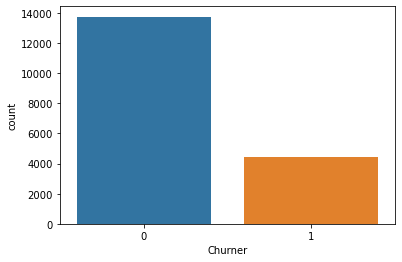

In [85]:
sns.countplot(x="Churner",data=data)

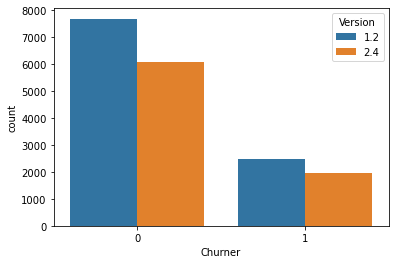

In [86]:
sns.countplot(x="Churner",hue="Version",data=data)

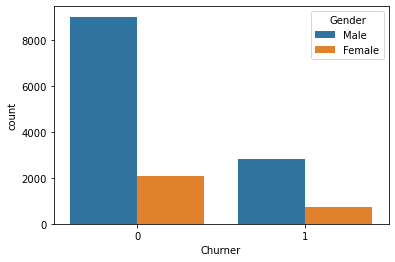

In [87]:
sns.countplot(x="Churner",hue="Gender",data=data)

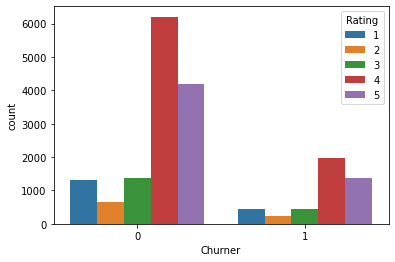

In [88]:
sns.countplot(x="Churner",hue="Rating",data=data)

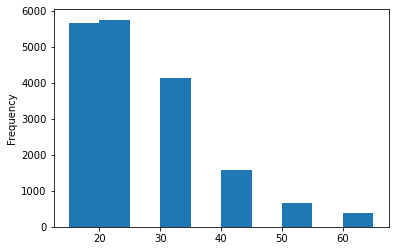

In [89]:
data["Age"].plot.hist()

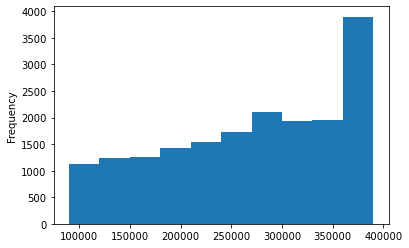

In [90]:
data["EncodedTime_T"].plot.hist()

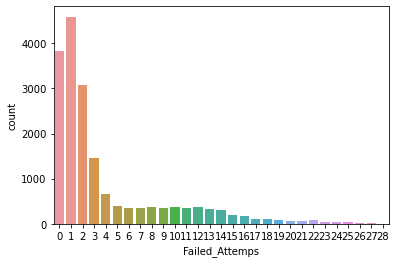

In [91]:
sns.countplot(x="Failed_Attemps",data=data)

In [ ]:
#veri ön işleme başlıyor.

In [92]:
data.isnull().sum()

Version              0
Rating               0
Gender            3544
EncodedTime_T        0
Date                 0
Cars_Unlocked        0
Age                  0
Current_Level        0
Currency             0
Failed_Attemps       0
Crash                0
Churner              0
dtype: int64

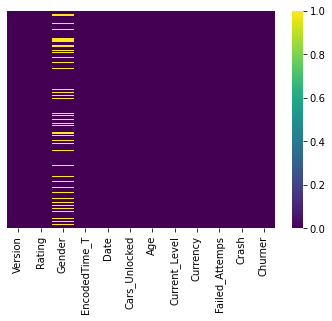

In [93]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [94]:
data.dropna(inplace=True)

In [95]:
data.isnull().sum()

Version           0
Rating            0
Gender            0
EncodedTime_T     0
Date              0
Cars_Unlocked     0
Age               0
Current_Level     0
Currency          0
Failed_Attemps    0
Crash             0
Churner           0
dtype: int64

In [ ]:
#eksik verilerimi temizledim

In [96]:
data.dtypes

Version           float64
Rating              int64
Gender             object
EncodedTime_T       int64
Date               object
Cars_Unlocked       int64
Age                 int64
Current_Level       int64
Currency            int64
Failed_Attemps      int64
Crash               int64
Churner             int64
dtype: object

In [ ]:
# object değişkenleri dönüştürmem  gerek 

In [97]:
Gender=pd.get_dummies(data["Gender"],drop_first=True)

In [64]:
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [65]:
#0 kadın 1 erkek

In [98]:
data.drop(["Gender"],axis=1,inplace=True)

In [ ]:
#cinsiyet stununu kaldırdım

In [99]:
data=pd.concat([data,Gender],axis=1)

In [ ]:
#concat methodu ile dönüştürdüğüm veriler eklendi

In [100]:
data.dtypes

Version           float64
Rating              int64
EncodedTime_T       int64
Date               object
Cars_Unlocked       int64
Age                 int64
Current_Level       int64
Currency            int64
Failed_Attemps      int64
Crash               int64
Churner             int64
Male                uint8
dtype: object

In [ ]:
#date hala object değerinde onu siliyorum

In [101]:
data.drop(["Date"],axis=1,inplace=True)

In [102]:
data.head()

,Version,Rating,EncodedTime_T,Cars_Unlocked,Age,Current_Level,Currency,Failed_Attemps,Crash,Churner,Male
0,2.4,1,284723,5,30,21,2267,4,0,0,1
1,2.4,1,349189,9,30,26,4813,4,0,0,1
2,1.2,5,294565,1,15,1,101,0,0,0,0
3,1.2,5,315633,4,15,15,1552,0,0,0,0
4,2.4,4,152785,1,21,1,102,0,0,0,1


In [ ]:
# veri ön işleme kısmı bitti

In [ ]:
#tahminleme başlıyor..

In [127]:
X=data.drop("Churner",axis=1)
y=data["Churner"]

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [ ]:
#veri setini parçaladım

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
# benim ikili Lojistik Regresyon analizini kullandım

In [184]:
lg_model=LogisticRegression(max_iter=10000)

In [185]:
#eğitim verisini kullanarak modeli eğittim

In [186]:
lg_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [187]:
lg_model.score(X_test,y_test)

0.7553191489361702

In [188]:
#model test verisini %75 doğruluk oranında doğru tahmin yapıyor

In [189]:
lg_model.score(X_train,y_train)

0.7578210258275737

In [190]:
#modelin eğitim verisinde %75 doğruluk oranında tahmin ediyor

In [191]:
#model de aşırı uydurma problemi yok skorlar birbirine yakın

In [192]:
print(lg_model.score(X_test,y_test))
print(lg_model.score(X_train,y_train))

0.7553191489361702
0.7578210258275737


In [193]:
#modelin sınıflarının ne kadar doğru tahmin ettiğini bulmak için confusion matris i kullanıyorum

In [194]:
from sklearn.metrics import confusion_matrix

In [195]:
tahmin=lg_model.predict(X_test)

In [196]:
confusion_matrix(y_test,tahmin)

array([[2683,   66],
       [ 831,   86]])

In [197]:
data.head()

,Version,Rating,EncodedTime_T,Cars_Unlocked,Age,Current_Level,Currency,Failed_Attemps,Crash,Churner,Male
0,2.4,1,284723,5,30,21,2267,4,0,0,1
1,2.4,1,349189,9,30,26,4813,4,0,0,1
2,1.2,5,294565,1,15,1,101,0,0,0,0
3,1.2,5,315633,4,15,15,1552,0,0,0,0
4,2.4,4,152785,1,21,1,102,0,0,0,1


In [198]:
import numpy as np
yeni_veri=np.array([[2.4,1,284723,5,30,21,2267,4,0,1]])

In [199]:
lg_model.predict(yeni_veri)

array([0])

In [200]:
#modelimiz Churner ı doğru tahmin etmiştir

In [201]:
lg_model.coef_

array([[-5.15684900e-03, -1.07819773e-02, -2.25960492e-06,
         3.20834255e-03, -3.19911082e-02,  5.98514296e-03,
         7.92858422e-05, -5.04237071e-03,  6.22516164e-05,
        -2.53351903e-03]])

In [202]:
yeni_veri2=np.array([[2.4,1,349189,9,30,26,4813,4,0,1]])
lg_model.predict(yeni_veri2)

array([0])